<a href="https://colab.research.google.com/github/lanashin/Data_Viz/blob/main/MT_INC_S2023_Svetlana.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Problem 1.

For this problem, you will work with a dataset about California Fire
Incidents from 2013 to 2020. You can download the dataset from
https://www.kaggle.com/datasets/ananthu017/california-wildfire-incidents-20132020/

(1 point) Create a dataframe (df) containing the California Fire
Incidents csv file. You can either post this
dataset online (for example, on your GitHub account), or upload it
locally. In the latter case, submit this dataset together with the
notebook.

(3 points) Output the plots for the total Acres Burned and Number of
Incidents for each year from 2013 to 2020. Think about the optimal
legend, axis labels, tickers colors, visualization title. Briefly
explain your choices of tickers and colors.

(3 points) Output the number of fire incidents in each County for the
year 2020. If a particular County has more than one incident, show the
sum of Acres Burned. Think about the optimal legend, axis labels,
tickers colors, visualization title. Briefly explain your choices of
tickers and colors.

In [61]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px

# Read the data into a pandas DataFrame.
df = pd.read_csv("https://raw.githubusercontent.com/lanashin/Data_Viz/main/California_Fire_Incidents.csv")
df

,AcresBurned,Active,AdminUnit,AirTankers,ArchiveYear,CalFireIncident,CanonicalUrl,ConditionStatement,ControlStatement,Counties,...,SearchKeywords,Started,Status,StructuresDamaged,StructuresDestroyed,StructuresEvacuated,StructuresThreatened,UniqueId,Updated,WaterTenders
0,257314.0,False,Stanislaus National Forest/Yosemite National Park,NaN,2013,True,/incidents/2013/8/17/rim-fire/,NaN,NaN,Tuolumne,...,"Rim Fire, Stanislaus National Forest, Yosemite...",2013-08-17T15:25:00Z,Finalized,NaN,NaN,NaN,NaN,5fb18d4d-213f-4d83-a179-daaf11939e78,2013-09-06T18:30:00Z,NaN
1,30274.0,False,USFS Angeles National Forest/Los Angeles Count...,NaN,2013,True,/incidents/2013/5/30/powerhouse-fire/,NaN,NaN,Los Angeles,...,"Powerhouse Fire, May 2013, June 2013, Angeles ...",2013-05-30T15:28:00Z,Finalized,NaN,NaN,NaN,NaN,bf37805e-1cc2-4208-9972-753e47874c87,2013-06-08T18:30:00Z,NaN
2,27531.0,False,CAL FIRE Riverside Unit / San Bernardino Natio...,NaN,2013,True,/incidents/2013/7/15/mountain-fire/,NaN,NaN,Riverside,...,"Mountain Fire, July 2013, Highway 243, Highway...",2013-07-15T13:43:00Z,Finalized,NaN,NaN,NaN,NaN,a3149fec-4d48-427c-8b2c-59e8b79d59db,2013-07-30T18:00:00Z,NaN
3,27440.0,False,Tahoe National Forest,NaN,2013,False,/incidents/2013/8/10/american-fire/,NaN,NaN,Placer,...,"American Fire, August 2013, Deadwood Ridge, Fo...",2013-08-10T16:30:00Z,Finalized,NaN,NaN,NaN,NaN,8213f5c7-34fa-403b-a4bc-da2ace6e6625,2013-08-30T08:00:00Z,NaN
4,24251.0,False,Ventura County Fire/CAL FIRE,NaN,2013,True,/incidents/2013/5/2/springs-fire/,Acreage has been reduced based upon more accur...,NaN,Ventura,...,"Springs Fire, May 2013, Highway 101, Camarillo...",2013-05-02T07:01:00Z,Finalized,6.0,10.0,NaN,NaN,46731fb8-3350-4920-bdf7-910ac0eb715c,2013-05-11T06:30:00Z,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1631,9.0,False,CAL FIRE / Riverside County Fire,NaN,2019,True,/incidents/2019/10/10/eagle-fire/,NaN,NaN,Riverside,...,NaN,2019-10-10T12:08:00Z,Finalized,NaN,NaN,NaN,NaN,6e93b252-99a3-4214-9921-238373b17535,2019-10-10T18:11:59.733Z,NaN
1632,2.0,False,CAL FIRE Nevada-Yuba-Placer Unit,NaN,2019,True,/incidents/2019/6/28/long-fire/,NaN,NaN,Nevada,...,NaN,2019-06-28T15:03:04Z,Finalized,NaN,NaN,NaN,NaN,b38c0563-b321-431b-9174-6336c5a0d449,2019-06-30T15:52:01.023Z,NaN
1633,NaN,False,Yolo County Fire Protection District,NaN,2019,False,/incidents/2019/11/25/cashe-fire/,NaN,NaN,Yolo,...,NaN,2019-11-25T12:02:02Z,Finalized,NaN,NaN,NaN,NaN,9c26f915-1b33-422d-b30a-9eb4da6fd729,2019-12-03T16:35:20.93Z,NaN
1634,NaN,False,Camp Pendleton Marine Corps Base,NaN,2019,False,/incidents/2019/10/22/oak-fire/,NaN,NaN,San Diego,...,NaN,2019-10-22T19:20:44Z,Finalized,NaN,NaN,NaN,NaN,7264a106-e0f4-41de-8fd0-3f9110431e28,2019-11-21T12:21:28.58Z,NaN


In [62]:
df.tail()

,AcresBurned,Active,AdminUnit,AirTankers,ArchiveYear,CalFireIncident,CanonicalUrl,ConditionStatement,ControlStatement,Counties,...,SearchKeywords,Started,Status,StructuresDamaged,StructuresDestroyed,StructuresEvacuated,StructuresThreatened,UniqueId,Updated,WaterTenders
1631,9.0,False,CAL FIRE / Riverside County Fire,NaN,2019,True,/incidents/2019/10/10/eagle-fire/,NaN,NaN,Riverside,...,NaN,2019-10-10T12:08:00Z,Finalized,NaN,NaN,NaN,NaN,6e93b252-99a3-4214-9921-238373b17535,2019-10-10T18:11:59.733Z,NaN
1632,2.0,False,CAL FIRE Nevada-Yuba-Placer Unit,NaN,2019,True,/incidents/2019/6/28/long-fire/,NaN,NaN,Nevada,...,NaN,2019-06-28T15:03:04Z,Finalized,NaN,NaN,NaN,NaN,b38c0563-b321-431b-9174-6336c5a0d449,2019-06-30T15:52:01.023Z,NaN
1633,NaN,False,Yolo County Fire Protection District,NaN,2019,False,/incidents/2019/11/25/cashe-fire/,NaN,NaN,Yolo,...,NaN,2019-11-25T12:02:02Z,Finalized,NaN,NaN,NaN,NaN,9c26f915-1b33-422d-b30a-9eb4da6fd729,2019-12-03T16:35:20.93Z,NaN
1634,NaN,False,Camp Pendleton Marine Corps Base,NaN,2019,False,/incidents/2019/10/22/oak-fire/,NaN,NaN,San Diego,...,NaN,2019-10-22T19:20:44Z,Finalized,NaN,NaN,NaN,NaN,7264a106-e0f4-41de-8fd0-3f9110431e28,2019-11-21T12:21:28.58Z,NaN
1635,NaN,False,Bureau of Indian Affairs,NaN,2019,False,/incidents/2019/10/14/johnson-fire/,"As of 10:00 p.m. on 10/16, the fire is 90% con...",NaN,Riverside,...,NaN,2019-10-14T15:32:20Z,Inactive,NaN,NaN,NaN,NaN,8bf75401-999f-42bd-8c0a-8db508591545,2019-10-30T10:14:19.58Z,NaN


Output the plots for the total Acres Burned and Number of Incidents for each year from 2013 to 2020. Think about the optimal legend, axis labels, tickers colors, visualization title. Briefly explain your choices of tickers and colors.

In [63]:
df.dtypes

AcresBurned             float64
Active                     bool
AdminUnit                object
AirTankers              float64
ArchiveYear               int64
CalFireIncident            bool
CanonicalUrl             object
ConditionStatement       object
ControlStatement         object
Counties                 object
CountyIds                object
CrewsInvolved           float64
Dozers                  float64
Engines                 float64
Extinguished             object
Fatalities              float64
Featured                   bool
Final                      bool
FuelType                 object
Helicopters             float64
Injuries                float64
Latitude                float64
Location                 object
Longitude               float64
MajorIncident              bool
Name                     object
PercentContained        float64
PersonnelInvolved       float64
Public                     bool
SearchDescription        object
SearchKeywords           object
Started 

In [64]:
#to find acres burned by year from 2013 to 2019
(
  df
  .groupby('ArchiveYear')
  .agg(
      sumBurned = ('AcresBurned', 'sum'),
    )
  .sort_values("ArchiveYear", ascending=False)
)

,sumBurned
ArchiveYear,
2019,285708.0
2018,3358049.0
2017,1793915.0
2016,505927.0
2015,574503.0
2014,448715.0
2013,527745.0


<Axes: >

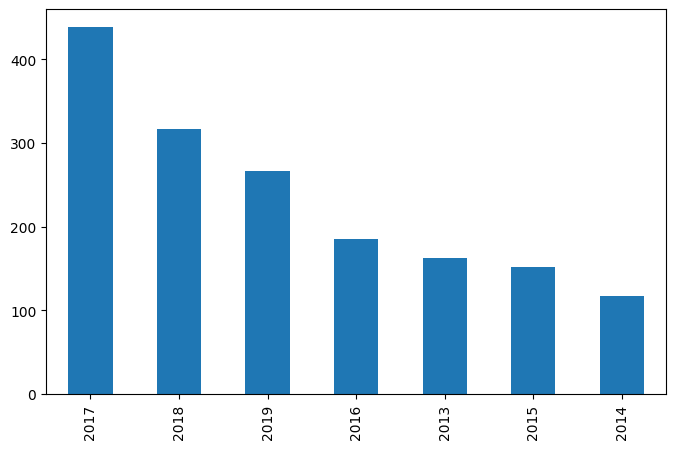

In [65]:
#organized the most numbers of acres burnt in what year
df['ArchiveYear'].value_counts().plot(kind='bar', figsize=(8,5))

Answer: I peresent this data in bar plot because it shows summary of numbers of burned acres the most on years (from largest to smalest).
I choose one color blue/grey because i want to focus on the data

**Output the number of fire incidents in each County for the year 2020. If a particular County has more than one incident, show the sum of Acres Burned. Think about the optimal legend, axis labels, tickers colors, visualization title. Briefly explain your choices of tickers and colors.**

In [66]:
df.columns

Index(['AcresBurned', 'Active', 'AdminUnit', 'AirTankers', 'ArchiveYear',
       'CalFireIncident', 'CanonicalUrl', 'ConditionStatement',
       'ControlStatement', 'Counties', 'CountyIds', 'CrewsInvolved', 'Dozers',
       'Engines', 'Extinguished', 'Fatalities', 'Featured', 'Final',
       'FuelType', 'Helicopters', 'Injuries', 'Latitude', 'Location',
       'Longitude', 'MajorIncident', 'Name', 'PercentContained',
       'PersonnelInvolved', 'Public', 'SearchDescription', 'SearchKeywords',
       'Started', 'Status', 'StructuresDamaged', 'StructuresDestroyed',
       'StructuresEvacuated', 'StructuresThreatened', 'UniqueId', 'Updated',
       'WaterTenders'],
      dtype='object')

In [67]:
#what is the number of accidents in 2019 in each county
county_19 = pd.DataFrame()
county19 = df.loc[df['ArcieveYear'].isin([('2019')])]
print(county_19.head(20))

KeyError: ignored

In [ ]:
fig = plt.figure(figsize=(10, 10))
ax = fig.gca()
county_19.plot(x = 'Year', y = 'Counties', ax=ax)
ax.set_title('Acres burned in 2019')
ax.set_xlabel('AcresBurned')
ax.set_ylabel('County')

Answer: in this presentation i wanted the show the acres burnt by county in 2019 year because data on 2020 doesn't exist in this csv file.

#Problem 2.

For this problem, you will work with a dataset that contains
information about different varieties of wheat seeds. The dataset has
210 instances with attributes like area, perimeter, compactness,
length, width, asymmetry coefficient, and groove length of the seeds,
along with their variety labels.

You can read more about the dataset here:
https://archive.ics.uci.edu/ml/datasets/seeds

The dataset can be downloaded from
https://www.kaggle.com/code/jmcaro/machine-learning-classifiers-wheat-seeds/input

(1 point) Create a dataframe (df) containing the txt file.

(3 points) Output a pie chart that describes the distribution of the
different varieties of seeds in the dataset. Think about the optimal
legend, axis labels, tickers colors, visualization title.

(4 points) Output box plots showing the distribution of each attribute
(excluding the variety label) for each of the three varieties of
seeds. Arrange the box plots in a grid, where each row represents a
variety and each column represents an attribute. Think about the
optimal legend, axis labels, tickers colors, visualization title.

In [68]:
df2 = pd.read_csv("https://raw.githubusercontent.com/lanashin/Data_Viz/main/seeds.csv")
df2

,Area,Perimeter,Compactness,Kernel.Length,Kernel.Width,Asymmetry.Coeff,Kernel.Groove,Type
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
...,...,...,...,...,...,...,...,...
194,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
195,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
196,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
197,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3


In [69]:
df2.dtypes

Area               float64
Perimeter          float64
Compactness        float64
Kernel.Length      float64
Kernel.Width       float64
Asymmetry.Coeff    float64
Kernel.Groove      float64
Type                 int64
dtype: object

In [70]:
df2.describe()

,Area,Perimeter,Compactness,Kernel.Length,Kernel.Width,Asymmetry.Coeff,Kernel.Groove,Type
count,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000
mean,14.918744,14.595829,0.870811,5.643151,3.265533,3.699217,5.420653,1.994975
std,2.919976,1.310445,0.023320,0.443593,0.378322,1.471102,0.492718,0.813382
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,1.000000
25%,12.330000,13.470000,0.857100,5.267000,2.954500,2.570000,5.046000,1.000000
50%,14.430000,14.370000,0.873400,5.541000,3.245000,3.631000,5.228000,2.000000
75%,17.455000,15.805000,0.886800,6.002000,3.564500,4.799000,5.879000,3.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.315000,6.550000,3.000000


Output a pie chart that describes the distribution of the different varieties of seeds in the dataset. Think about the optimal legend, axis labels, tickers colors, visualization title.

In [86]:
distri = df.groupby(by='Type')['Area'].sum()
distri = distri.to_frame()
distri

,Area
Type,
1,29.10
2,31.02
3,14.29


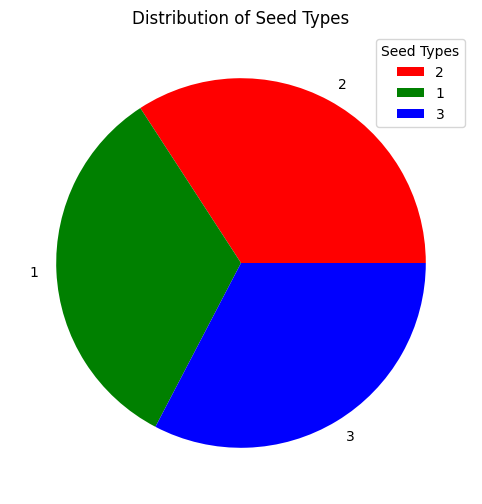

In [98]:
df = pd.DataFrame(distri)
plt.figure(figsize=(8, 6))
plt.pie(type_counts, labels=type_counts.index, colors=['red', 'green', 'blue'])

plt.title('Distribution of Seed Types')
plt.legend(type_counts.index, title='Seed Types')

plt.show()

Output box plots showing the distribution of each attribute (excluding the variety label) for each of the three varieties of seeds. Arrange the box plots in a grid, where each row represents a variety and each column represents an attribute. Think about the optimal legend, axis labels, tickers colors, visualization title.

In [108]:
import plotly.express as px

fig = px.box(df2, x="Type", y="Area",
             title="Distribution of each seed type",
             category_orders={"Type": ["Type1", "Type2", "Type3"]},
             color="Type",
             height=500)

fig.show()